In [ ]:

# Etape 1: Import des librairies
# ==========================
# Ici, on importe toutes les librairies nécessaires pour l'analyse et la préparation des données
import pandas as pd              # Pour manipuler les dataframes
import numpy as np               # Pour les calculs numériques
import matplotlib.pyplot as plt  # Pour la visualisation
import seaborn as sns            # Pour des visualisations plus avancées
from sklearn.preprocessing import StandardScaler  # Pour normaliser les données
from sklearn.model_selection import train_test_split  # Pour séparer train/test
from sklearn.impute import SimpleImputer  # Pour gérer les valeurs manquantes

# Affichage des graphiques directement dans le notebook
%matplotlib inline


In [ ]:
# Etape 2: Charger le dataset
# ==========================
# On charge le fichier CSV et on regarde les premières lignes pour comprendre sa structure
df = pd.read_csv("creditcard.csv")  # Remplace le chemin si nécessaire
df.head()  # Affiche les 5 premières lignes


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Etape 3: Aperçu rapide des données
# ==========================
# On vérifie le nombre de lignes, colonnes et les types de données
df.info()

# On regarde les statistiques descriptives pour les colonnes numériques
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:

# Etape 4: Vérification des valeurs manquantes
missing_values = df.isnull().sum()
missing_values  # Affiche le nombre de valeurs manquantes par colonne


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class
0    284315
1       492
Name: count, dtype: int64


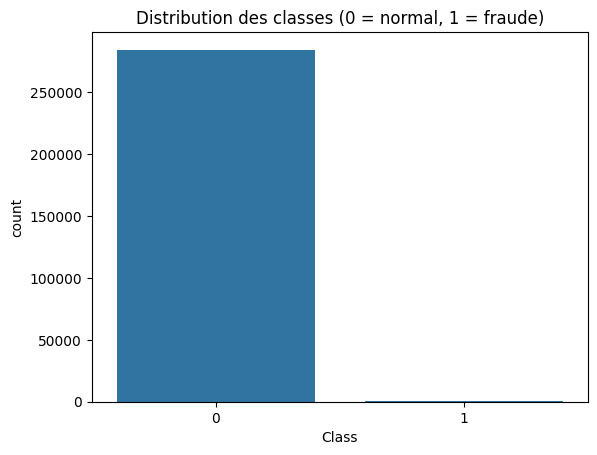

In [ ]:
# Etape 5: Analyse de la distribution des classes
# ==========================
# Vérifier le déséquilibre des classes (fraude vs normale)
class_counts = df['Class'].value_counts()
print(class_counts)

# Visualisation graphique
sns.countplot(x='Class', data=df)
plt.title("Distribution des classes (0 = normal, 1 = fraude)")
plt.show()


In [ ]:
# Etape 6: Nettoyage et traitement des données
# ==========================
# Pour ce dataset, il n'y a généralement pas de valeurs manquantes
# Si jamais il y en avait, voici comment les remplir avec la moyenne
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# Etape 7: Normalisation de la colonne 'Amount' et 'Time'
# ==========================
# Les colonnes anonymisées V1-V28 sont déjà centrées et réduites
# On standardise 'Amount' et 'Time' pour que toutes les features soient comparables
scaler = StandardScaler()
df_imputed['Amount_scaled'] = scaler.fit_transform(df_imputed['Amount'].values.reshape(-1,1))
df_imputed['Time_scaled'] = scaler.fit_transform(df_imputed['Time'].values.reshape(-1,1))

# On peut supprimer les colonnes originales 'Amount' et 'Time'
df_prepared = df_imputed.drop(['Amount', 'Time'], axis=1)
df_prepared.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled,Time_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,-0.073403,-1.996541


In [ ]:
# Etape 8: Séparation des features et de la target
# ==========================
# X = features, y = target
X = df_prepared.drop('Class', axis=1)
y = df_prepared['Class']

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)


Shape de X: (284807, 30)
Shape de y: (284807,)


In [ ]:
# Etape 9: Séparation train/test
# ==========================
# On sépare les données en train/test (80% train, 20% test)
# stratify=y permet de conserver le déséquilibre des classes dans les deux sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)


Shape X_train: (227845, 30)
Shape X_test: (56962, 30)


In [ ]:
# Etape 10: Vérification finale
# ==========================
# On vérifie que tout est prêt pour le machine learning
print("Train set:")
print(y_train.value_counts(normalize=True))
print("\nTest set:")
print(y_test.value_counts(normalize=True))


Train set:
Class
0.0    0.998271
1.0    0.001729
Name: proportion, dtype: float64

Test set:
Class
0.0    0.99828
1.0    0.00172
Name: proportion, dtype: float64


In [ ]:

# Etape 11: Détection et traitement des outliers
# ==========================
# Les outliers peuvent influencer les modèles, surtout pour 'Amount'
# On utilise l'IQR (Interquartile Range) pour détecter les outliers
Q1 = df_prepared['Amount_scaled'].quantile(0.25)
Q3 = df_prepared['Amount_scaled'].quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# On filtre les outliers
df_no_outliers = df_prepared[(df_prepared['Amount_scaled'] >= lower_bound) & 
                             (df_prepared['Amount_scaled'] <= upper_bound)]

print("Shape avant suppression des outliers:", df_prepared.shape)
print("Shape après suppression des outliers:", df_no_outliers.shape)


Shape avant suppression des outliers: (284807, 31)
Shape après suppression des outliers: (252903, 31)


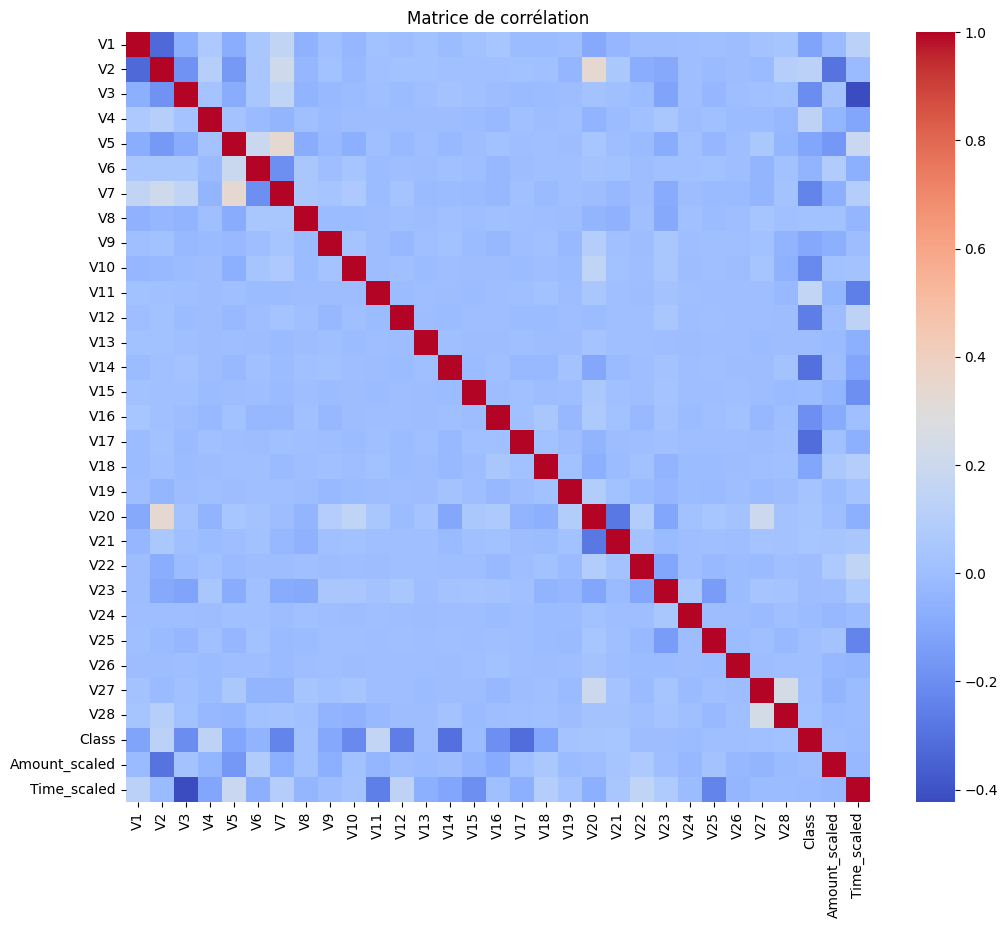

In [ ]:
# Etape 12: Analyse des corrélations
plt.figure(figsize=(12,10))
sns.heatmap(df_no_outliers.corr(), cmap='coolwarm', annot=False)
plt.title("Matrice de corrélation")
plt.show()


In [ ]:
# Etape 13: Séparation features/target après nettoyage
# ==========================
X_clean = df_no_outliers.drop('Class', axis=1)
y_clean = df_no_outliers['Class']

print("Shape X_clean:", X_clean.shape)
print("Shape y_clean:", y_clean.shape)


Shape X_clean: (252903, 30)
Shape y_clean: (252903,)


In [ ]:

# Etape 14: Séparation train/test après nettoyage
# ==========================
# On conserve le déséquilibre des classes
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)

print("Train set:")
print(y_train_clean.value_counts(normalize=True))
print("\nTest set:")
print(y_test_clean.value_counts(normalize=True))


Train set:
Class
0.0    0.998413
1.0    0.001587
Name: proportion, dtype: float64

Test set:
Class
0.0    0.998418
1.0    0.001582
Name: proportion, dtype: float64


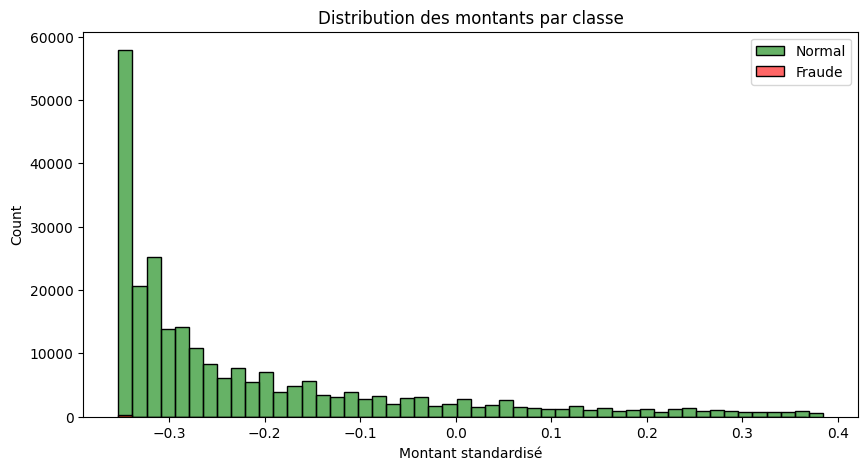

In [ ]:
# Etape 15: Optionnel - Visualisation avancée des features
# ==========================
# On peut explorer certaines features importantes
plt.figure(figsize=(10,5))
sns.histplot(df_no_outliers[df_no_outliers['Class']==0]['Amount_scaled'], color='green', label='Normal', bins=50, alpha=0.6)
sns.histplot(df_no_outliers[df_no_outliers['Class']==1]['Amount_scaled'], color='red', label='Fraude', bins=50, alpha=0.6)
plt.title("Distribution des montants par classe")
plt.xlabel("Montant standardisé")
plt.legend()
plt.show()


In [ ]:
# Etape 16: Sauvegarde du dataset préparé
# ==========================
# On peut sauvegarder le dataset nettoyé et prêt pour ML
df_no_outliers.to_csv("creditcard_prepared.csv", index=False)
print("Dataset préparé sauvegardé dans 'creditcard_prepared.csv'")


Dataset préparé sauvegardé dans 'creditcard_prepared.csv'
